# Model6 

- เป็น Model ที่ต่อยอดมาจาก Model3 โดยใช้ข้อมูลในการ Train ที่ได้จากการหาค่าเฉลี่ยในแต่ละวันที่ใช้ mudule ชื่อ moving_average.py ในการหาค่าเฉลีี่ย
- ข้อมูลที่ใช้ในการ trian model3 นั้นเป็นข้อมูลดิบ

In [1]:
%pip install "pycaret[full]"

Note: you may need to restart the kernel to use updated packages.


# Get Data

ข้อมูลที่ใช้คือค่าเฉลี่ยในแต่ละวัน ตั้งแต่ 2024-01-01 ถึง 2024-03-10

In [2]:
from pycaret.datasets import get_data
data = get_data('avg_pm25')

,Unnamed: 0,Date,PM25
0,0,2024-01-01,16.80
1,1,2024-01-02,13.13
2,2,2024-01-03,15.30
3,3,2024-01-04,17.24
4,4,2024-01-05,17.72


# Clean data

In [3]:
del data['Unnamed: 0']
data

,Date,PM25
0,2024-01-01,16.80
1,2024-01-02,13.13
2,2024-01-03,15.30
3,2024-01-04,17.24
4,2024-01-05,17.72
...,...,...
65,2024-03-06,24.61
66,2024-03-07,22.72
67,2024-03-08,22.71
68,2024-03-09,17.23


<Axes: >

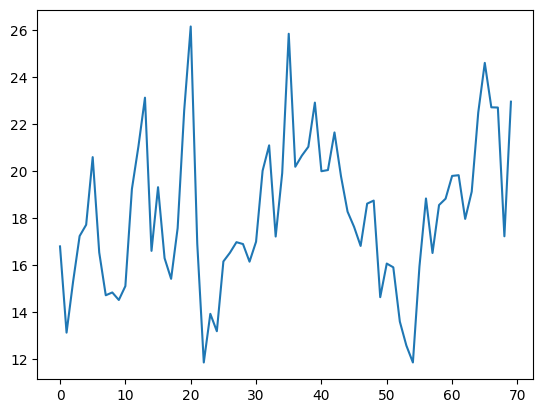

In [4]:
data['PM25'].plot()

In [5]:
data.dtypes

Date     object
PM25    float64
dtype: object

In [6]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date    datetime64[ns]
PM25           float64
dtype: object

In [7]:
data.set_index('Date', drop=True, inplace=True)

<Axes: xlabel='Date'>

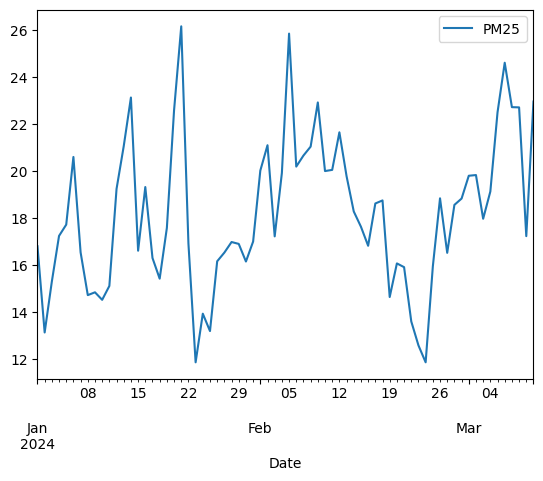

In [8]:
data.plot()

# setup

In [9]:
from pycaret.time_series import *
s = setup(data, fold=3, fh=12, target='PM25')

,Description,Value
0,session_id,7933
1,Target,PM25
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(70, 1)"
5,Transformed data shape,"(70, 1)"
6,Transformed train set shape,"(58, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [10]:
plot_model()

In [11]:
plot_model(plot='train_test_split')

In [12]:
plot_model(plot='cv')

In [13]:
plot_model(plot='diagnostics')

In [14]:
all_columns = data[data.columns[0]].count()
all_columns

70

In [15]:
test = data.sample(int(0.3*all_columns), random_state=20)
train = data.drop(test.index)

In [16]:
train.shape, test.shape

((49, 1), (21, 1))

# Compare_models

In [17]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,1.0124,0.9712,2.5228,3.1316,0.1479,0.1446,-1.1692,0.5100
auto_arima,Auto ARIMA,1.0842,1.0098,2.7091,3.2505,0.1611,0.1550,-1.3110,0.1067
arima,ARIMA,1.0878,1.0197,2.7225,3.2888,0.1627,0.1558,-1.3265,0.4333
grand_means,Grand Means Forecaster,1.0990,1.0319,2.7528,3.3304,0.1651,0.1575,-1.3645,0.4233
theta,Theta Forecaster,1.2575,1.1710,3.2224,3.8348,0.2011,0.1807,-1.8893,0.0167
croston,Croston,1.2677,1.1618,3.1753,3.7465,0.1954,0.1795,-1.8946,0.0100
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.4131,1.2772,3.6726,4.2262,0.2321,0.1981,-2.6932,0.0733
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4628,1.3194,3.7604,4.3254,0.2352,0.2066,-2.6695,0.1233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.5721,1.4135,3.9812,4.5840,0.2434,0.2161,-3.1891,0.1467
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.5887,1.4012,4.0662,4.5808,0.2502,0.2230,-3.1103,0.1433


# เลือกโมเดลนอกเหนือจากโมเดลที่ดีที่สุด(best)

เลือกโมเดลที่ชื่อว่า rf_cds_dt

In [18]:
rf_cds_dt = create_model('rf_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-01-22,1.5778,1.3247,4.4464,4.6880,0.2764,0.2395,-2.5657
1,2024-02-03,1.1862,1.2221,2.8937,3.8601,0.1344,0.1472,-2.5503
2,2024-02-15,1.9523,1.6936,4.6036,5.2039,0.3195,0.2617,-4.4514
Mean,NaT,1.5721,1.4135,3.9812,4.5840,0.2434,0.2161,-3.1891
SD,NaT,0.3128,0.2024,0.7717,0.5535,0.0791,0.0496,0.8926


# Predict_model

rf_cds_dt

In [19]:
predict_model(rf_cds_dt, fh=24)

,y_pred
2024-02-28,16.1240
2024-02-29,16.4900
2024-03-01,16.0681
2024-03-02,16.5006
2024-03-03,16.0787
2024-03-04,16.5112
2024-03-05,16.0893
2024-03-06,16.5219
2024-03-07,16.0999
2024-03-08,16.5325


best

In [20]:
predict_model(best, fh=24)

กราฟการ predict ของโมเดล rf_cds_dt

In [21]:
plot_model(rf_cds_dt, plot = 'forecast', data_kwargs={'fh' : 24})

กราฟการ predict ของโมเดล best

# Finalize_model

In [22]:
plot_model(best, plot = 'forecast', data_kwargs={'fh' : 24})

In [23]:
final_model = finalize_model(best)

In [24]:
final_rf_cds_dt = finalize_model(rf_cds_dt)

In [25]:
predict_model(final_rf_cds_dt, fh = 7)

,y_pred
2024-03-11,20.9832
2024-03-12,20.3071
2024-03-13,20.7494
2024-03-14,20.4895
2024-03-15,22.0564
2024-03-16,22.7296
2024-03-17,21.3069


In [26]:
predict_model(final_model, fh = 7)

,y_pred
2024-03-11,22.96
2024-03-12,22.96
2024-03-13,22.96
2024-03-14,22.96
2024-03-15,22.96
2024-03-16,22.96
2024-03-17,22.96


final_rf_cds_dt

In [27]:
# dt_cds_dt
plot_model(final_rf_cds_dt, plot = 'forecast', data_kwargs={'fh' : 24})

final_model(best)

In [28]:
plot_model(final_model, plot = 'forecast', data_kwargs={'fh' : 7})

# ทำไมค่าที่ได้ถึงเป็นแบบนี้

สาเหตุคือ
- ข้อมูลที่ใช้ Train model มีจำนวนน้อย
- การเลือกโมเดลมีผลต่อค่า predict
- การ setup ค่า fold, fh 

วิธีแก้
>>> ข้อมูลที่ใช้ Train model ควรมีมากกว่านี้ (แต่ใน air4thai สามารถดึงข้อมูลย้อนหลังได้มากสุดแค่ 3 เดือน)
